In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from matplotlib.ticker import AutoMinorLocator
from scipy.stats import sem
import networkx as nx
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from sklearn.metrics import r2_score
from functions import make_directory, curve_fit_log

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'arial'

In [2]:
colors = ['b', 'r', 'g', 'magenta']
methods = ['closeness', 'betweenness', 'eigenvector']
f_names = ['$f_1$', '$f_2$', '$f_3$', '$f_4$']
labels = ['ACC', 'ABW', 'AEV']
FOLDER = 'Figure4' 
data = []
for method in methods:
    for f_name in f_names:
        a = np.loadtxt(f'Figure3/corr/{method}_0.8_{f_name}.csv', delimiter=',')
        for t in a.transpose():
            data.append([method, f_name, t[0], t[1]])

x, y = r'$\langle k \rangle$', 'y'
df = pd.DataFrame(data, columns = ['CSM', 'band', x, y])

C:\Users\ateymo2\Python\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


r2_score $f_1$ 0.25
r2_score $f_2$ 0.49
r2_score $f_3$ 0.69
r2_score $f_4$ 0.69


C:\Users\ateymo2\AppData\Local\Temp\ipykernel_31060\2309917618.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


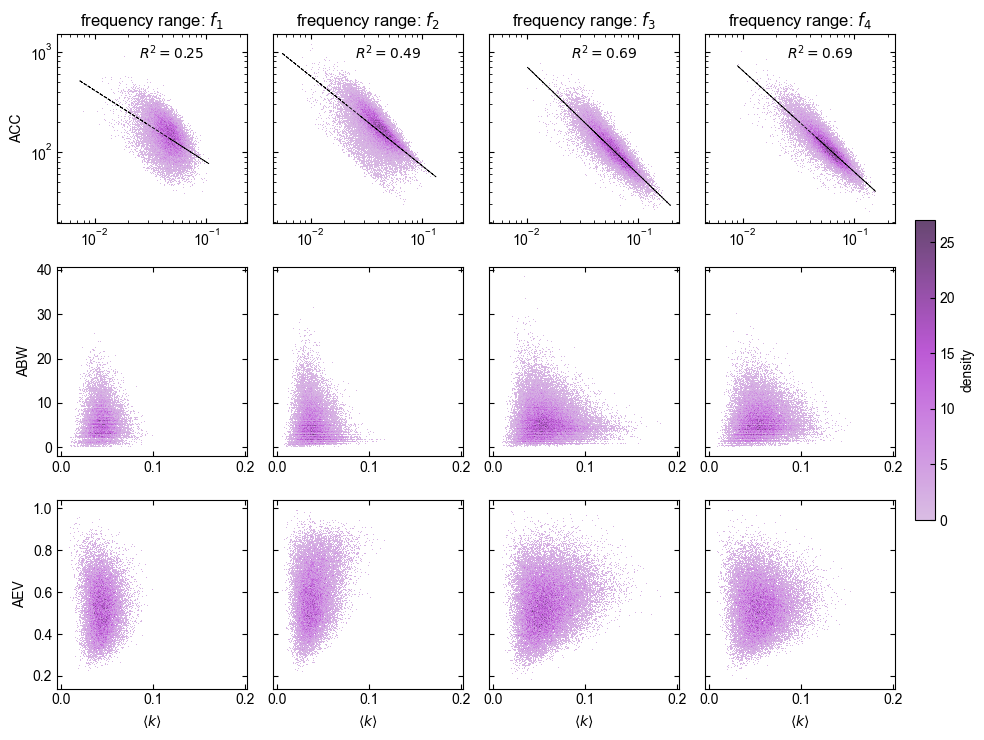

In [3]:
g = sns.FacetGrid(df, row='CSM', col='band', despine=False, sharex='row', 
                  sharey='row', aspect=1, height=2.5)
cax = g.fig.add_axes([.92, .3, .02, .4])
g.axes[0][0].set(xscale='log', yscale="log")
g.map(sns.histplot, x, y, cbar=True, cbar_ax=cax, color='mediumorchid', bins=200, log_scale=(False,False),
     cbar_kws={'label': 'density'})
g.tick_params(which='both', direction = 'in', right=True, top=True)

for row in g.axes:
    for ax in row:
        ax.set_title('')

g.axes[0][0].set_ylabel('ACC')
g.axes[1][0].set_ylabel('ABW')
g.axes[2][0].set_ylabel('AEV')

g.axes[0][0].set_title(r'frequency range: $f_1$', fontsize=12)
g.axes[0][1].set_title(r'frequency range: $f_2$', fontsize=12)
g.axes[0][2].set_title(r'frequency range: $f_3$', fontsize=12)
g.axes[0][3].set_title(r'frequency range: $f_4$', fontsize=12)

f  = lambda x, a, b, c: a*x**(-b) + c
for i in range(len(f_names)):
    band = f_names[i]
    a = np.loadtxt(f'Figure3/corr/closeness_0.8_{band}.csv', delimiter=',')
    xs, y_true = a[0], a[1]
    
    popt_log, _, ydatafit_log = curve_fit_log(xs, y_true)
    g.axes[0][i].plot(xs, ydatafit_log, color='black', lw=0.65, ls='--')
    
    score = round(r2_score(y_true, ydatafit_log), 2)
    print('r2_score', band, score)
    g.axes[0][i].text(0.025, 10e2 - 150, f'$R^2 = {score}$',)

plt.tight_layout()
g.fig.subplots_adjust(right=.9)
make_directory(FOLDER)
plt.savefig(f'{FOLDER}/Figure4.pdf', bbox_inches='tight')
plt.savefig(f'{FOLDER}/Figure4.eps', bbox_inches='tight')
plt.savefig(f'{FOLDER}/Figure4.svg', dpi=500, bbox_inches='tight')
plt.savefig(f'{FOLDER}/Figure4.jpeg', dpi=500, bbox_inches='tight')
plt.show()